# Getting Information on the peaks

We want to get the peaks from the spectra.
We start importing and creating the TOF object with all isotopes from Ar and Kr

In [7]:
from tofsim import ToF

In [8]:

T = ToF('Ar,Kr')
T.Vs = 120                      # Extraction voltaje
T.Vd = 3000                     # Acceleration voltaje
T.signal();                     # Make the spectra

In [9]:
p = T.get_statistics_peaks()    # Get the peaks

Here `p`  is a dictionary-like object, where each key is a substance and each value is a dictionary with the information on each peak

In [10]:
p.keys()

dict_keys(['36Ar^{+}', '38Ar^{+}', '40Ar^{+}', '78Kr^{+}', '80Kr^{+}', '82Kr^{+}', '83Kr^{+}', '84Kr^{+}', '86Kr^{+}'])

In [11]:
list(p.values())[0]

{'index': (53, 56, 60),
 'position': 8.519009871520703,
 'height': 6.774956591427326,
 'width': 0.03684000090535555}

In [12]:
p.headers

['index', 'position', 'height', 'width']

## Output the data of the peaks

In [13]:
print(p)


Substance    index              position      height      width
-----------  ---------------  ----------  ----------  ---------
36Ar^{+}     (53, 56, 60)        8.51901     6.77496  0.03684
38Ar^{+}     (97, 101, 104)      8.75419     1.28081  0.03684
40Ar^{+}     (140, 144, 147)     8.98108  2010.2      0.03684
78Kr^{+}     (816, 820, 825)    12.5402      6.76633  0.0473657
80Kr^{+}     (846, 851, 855)    12.7016     43.8943   0.0473657
82Kr^{+}     (876, 881, 885)    12.8594    222.046    0.0473657
83Kr^{+}     (891, 896, 900)    12.938     220.033    0.0473657
84Kr^{+}     (906, 910, 915)    13.0137   1079.69     0.0473657
86Kr^{+}     (935, 940, 944)    13.1696    329.294    0.0473657


If we want to print them in a different way we may use directly the dictionary-like object or the list obtained by using `tolist()` method

In [14]:
pl = p.tolist()
pl[0]

['36Ar^{+}',
 (53, 56, 60),
 8.519009871520703,
 6.774956591427326,
 0.03684000090535555]

Importing and using the tabulate package we may output it to any supported format. For instance, "fancy_grid":

In [15]:
from tabulate import tabulate
headers = ['Fragment'] + p.headers

In [16]:
print(tabulate(p.tolist(), headers=headers, tablefmt='fancy_grid'))

╒════════════╤═════════════════╤════════════╤════════════╤═══════════╕
│ Fragment   │ index           │   position │     height │     width │
╞════════════╪═════════════════╪════════════╪════════════╪═══════════╡
│ 36Ar^{+}   │ (53, 56, 60)    │    8.51901 │    6.77496 │ 0.03684   │
├────────────┼─────────────────┼────────────┼────────────┼───────────┤
│ 38Ar^{+}   │ (97, 101, 104)  │    8.75419 │    1.28081 │ 0.03684   │
├────────────┼─────────────────┼────────────┼────────────┼───────────┤
│ 40Ar^{+}   │ (140, 144, 147) │    8.98108 │ 2010.2     │ 0.03684   │
├────────────┼─────────────────┼────────────┼────────────┼───────────┤
│ 78Kr^{+}   │ (816, 820, 825) │   12.5402  │    6.76633 │ 0.0473657 │
├────────────┼─────────────────┼────────────┼────────────┼───────────┤
│ 80Kr^{+}   │ (846, 851, 855) │   12.7016  │   43.8943  │ 0.0473657 │
├────────────┼─────────────────┼────────────┼────────────┼───────────┤
│ 82Kr^{+}   │ (876, 881, 885) │   12.8594  │  222.046   │ 0.0473657 │
├─────

or "latex":

In [17]:
print(tabulate(p.tolist(), headers=headers, tablefmt='latex'))

\begin{tabular}{llrrr}
\hline
 Fragment   & index           &   position &     height &     width \\
\hline
 36Ar\^{}\{+\}   & (53, 56, 60)    &    8.51901 &    6.77496 & 0.03684   \\
 38Ar\^{}\{+\}   & (97, 101, 104)  &    8.75419 &    1.28081 & 0.03684   \\
 40Ar\^{}\{+\}   & (140, 144, 147) &    8.98108 & 2010.2     & 0.03684   \\
 78Kr\^{}\{+\}   & (816, 820, 825) &   12.5402  &    6.76633 & 0.0473657 \\
 80Kr\^{}\{+\}   & (846, 851, 855) &   12.7016  &   43.8943  & 0.0473657 \\
 82Kr\^{}\{+\}   & (876, 881, 885) &   12.8594  &  222.046   & 0.0473657 \\
 83Kr\^{}\{+\}   & (891, 896, 900) &   12.938   &  220.033   & 0.0473657 \\
 84Kr\^{}\{+\}   & (906, 910, 915) &   13.0137  & 1079.69    & 0.0473657 \\
 86Kr\^{}\{+\}   & (935, 940, 944) &   13.1696  &  329.294   & 0.0473657 \\
\hline
\end{tabular}


## Plot the data

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
pa = np.asarray(pl)

We will plot the position and width of each peak as a function of the mass of the fragment: 

In [27]:
x = [T.fragments[k]['M'] for k in pa[:,0]]
ypos = pa[:,2]
ywidth = pa[:,4]

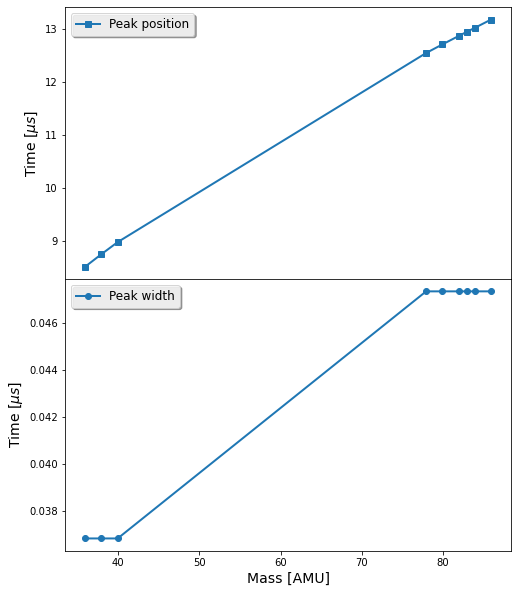

In [28]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))
ax[0].plot(x, ypos, '-s', label='Peak position')
ax[1].plot(x, ywidth, '-o', label='Peak width')
ax[1].set_xlabel(r'Mass [AMU]')

ax[0].set_ylabel(r'Time [$\mu s$]')
ax[1].set_ylabel(r'Time [$\mu s$]')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.subplots_adjust(hspace=0)
